<a href="https://colab.research.google.com/github/Sri-Durga/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gathering data**

In [ ]:
# Drive link
# https://drive.google.com/drive/folders/1Aus3KbHI8ZjQJC4DpEZiD8buw8rcJBmB?usp=sharing

**Dataset Preprocessing**

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

dir = '/content/drive/MyDrive/Minor-Project/Images'

categories =  ['AirPlanes', 'Bikes', 'Cars']
target = []
flat_data = []

for x in categories:
  i = categories.index(x)
  path = os.path.join(dir, x)
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path, img))
    img_resize = resize(img_arr,(50,50,3))
    img_resize = rgb2gray(img_resize)
    flat_data.append(img_resize.flatten())
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)


**Bar graph for categories**

<BarContainer object of 3 artists>

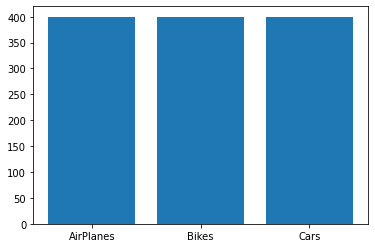

In [4]:
ele, cnt = np.unique(target, return_counts=True)
plt.bar(categories, cnt)


**Splitting data**

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target)


**Training and testing of the model**

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
grid = [ {'C':[1,10,100,1000], 'kernel':['linear','rbf'], 'gamma':[0.001,0.0001]}]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, grid)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0,
       1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1])

**Accuracy score**

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9433333333333334

**Confusion matrix**

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[102,   1,   3],
       [  7,  86,   2],
       [  3,   1,  95]])

**Plotting the confusion matrix**

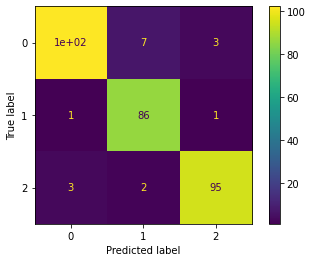

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)


**Testing the model**

Enter url of the image: https://image.freepik.com/free-vector/commercial-airplane-white-background_1308-22827.jpg
(269, 626, 3)
Predicted output is : AirPlanes


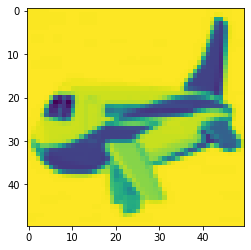

In [12]:
flat_data = []
url = input("Enter url of the image: ")
img = imread(url)
img_resize = resize(img,(50,50,3))
img_resize = rgb2gray(img_resize)
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = clf.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted output is : {y_out}')
